<a href="https://colab.research.google.com/github/hughCulling/sleeping-pattern/blob/main/sleeping_pattern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

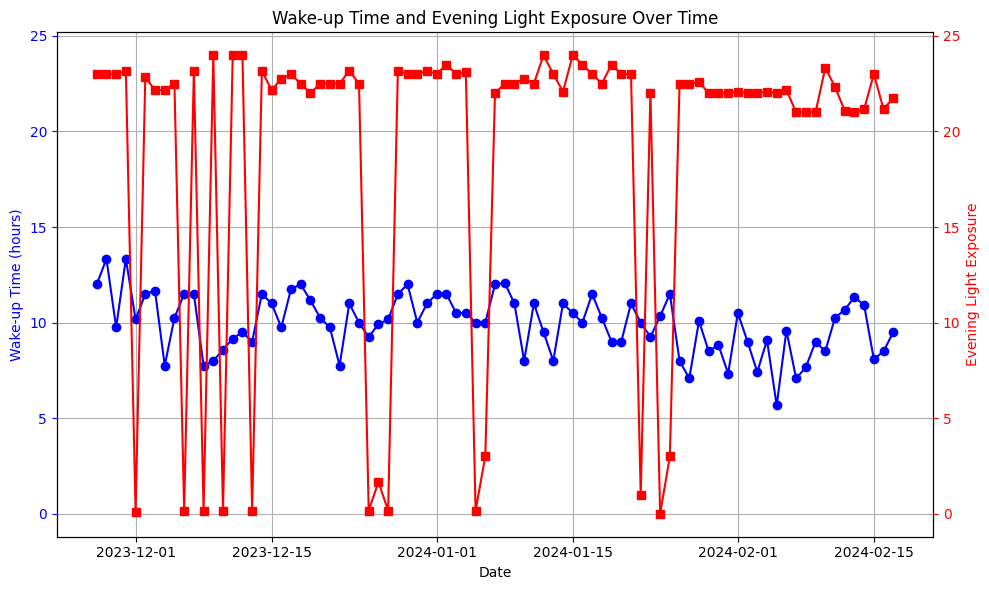

In [1]:
# Step 3: Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 4: Read the Excel file
file_path = '/content/sleep-data.xlsx'  # Replace with the actual path to your Excel file
df = pd.read_excel(file_path)

# Step 5: Convert the "Wake-up time" column to decimal hours
df['Wake-up time'] = df['Wake-up time'].apply(lambda x: x.hour + x.minute / 60 if not pd.isnull(x) else None)

# Step 6: Fill missing values in the "Wake-up time" column with the average wake-up time
average_wakeup_time = df['Wake-up time'].mean()
df['Wake-up time'].fillna(average_wakeup_time, inplace=True)

# Step 7: Convert the "Evening light exposure" column to decimal hours
df['Evening light exposure'] = df['Evening light exposure'].apply(lambda x: x.hour + x.minute / 60 if not pd.isnull(x) else None)

# Step 8: Fill missing values in the "Evening light exposure" column with the average value
average_light_exposure = df['Evening light exposure'].mean()
df['Evening light exposure'].fillna(average_light_exposure, inplace=True)

# Step 9: Plot the data
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot for "Wake-up time" on the primary y-axis
ax1.plot(df['Date'], df['Wake-up time'], marker='o', linestyle='-', color='b', label='Wake-up Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Wake-up Time (hours)', color='b')
ax1.tick_params('y', colors='b')
ax1.grid(True)

# Create a secondary y-axis for "Evening light exposure"
ax2 = ax1.twinx()
ax2.plot(df['Date'], df['Evening light exposure'], marker='s', linestyle='-', color='r', label='Evening Light Exposure')
ax2.set_ylabel('Evening Light Exposure', color='r')
ax2.tick_params('y', colors='r')

# Set the same y-axis limits for both axes
y_min = min(ax1.get_ylim()[0], ax2.get_ylim()[0])
y_max = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)

# Title and legend
plt.title('Wake-up Time and Evening Light Exposure Over Time')

# Show the plot
plt.tight_layout()
plt.show()
